In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

# ------------------------------------------------------------------------------

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, SelectKBest, f_classif, mutual_info_classif

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, precision_recall_curve, classification_report
# ------------------------------------------------------------------------------

import warnings
warnings.filterwarnings('ignore')

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

/Users/samashti/opt/miniforge3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/utils.py:361: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/samashti/opt/miniforge3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/utils.py:361: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/samashti/opt/miniforge3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/utils.py:361: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


# Exploratory Data Analysis

**Data Loading and Preliminary Analysis:**

Load the data and perform a preliminary analysis to understand its structure, types of variables, and any immediate preprocessing needs.

In [3]:
# Load the dataset
file_path = '../data/wip/ml-training-data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for a preliminary view
data.head()

,Lithology,010,011,012,013,014,015,016,017,018,...,212,213,214,215,216,217,218,219,220,221
0,Lm-Ml-Sl,23731,22772,22866,23430,23285,23961,24160,24961,24709,...,28358,27983,27279,27922,26596,26651,27078,21416,25345,26311
1,Lm-Ml-Sl,31334,30113,30321,30956,30733,31200,31807,32621,32382,...,37572,36975,35871,36647,34757,35778,35748,29069,33900,34440
2,Lm-Ml-Sl,39900,38061,38502,39196,38761,39378,39721,41141,40477,...,44715,43762,42838,43695,41713,43342,42869,36174,42101,42191
3,Lm-Ml-Sl,31106,29605,30013,30694,30599,30935,31288,32456,32009,...,36381,35685,34560,34960,33553,34638,33631,28749,33658,33904
4,Lm-Ml-Sl,43764,41758,42124,43029,42659,43490,43952,45418,45065,...,50479,49234,47976,48896,46880,49021,48253,40303,46561,46961


The dataset contains the 'Lithology' column, which is our target variable for classification, and 157 other columns that are the features for training.

**Data Cleaning and Preprocessing:**

Check for missing values, data types, and any anomalies.

**Exploratory Data Analysis:** 

Understand the distribution of the target variable, the scale of feature variables, and any correlations that might be important.

In [4]:
data.describe()

,010,011,012,013,014,015,016,017,018,019,...,212,213,214,215,216,217,218,219,220,221
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,34107.877551,32707.214286,32909.367347,33607.581633,33316.510204,33815.500000,34224.979592,35306.112245,34918.142857,32763.602041,...,39126.744898,38537.673469,37554.459184,38396.234694,36840.765306,37853.969388,37868.489796,31142.469388,36118.928571,36552.867347
std,5169.795715,5011.229195,4930.004773,4993.799570,4965.707400,5058.370216,5139.459974,5323.941912,5325.577802,5037.115518,...,5643.107281,5635.678694,5481.508749,5682.812538,5675.748390,5864.498800,6134.846607,4892.138725,5400.865552,5297.731220
min,23077.000000,21948.000000,22237.000000,23114.000000,22880.000000,23187.000000,23536.000000,24313.000000,23955.000000,22268.000000,...,26715.000000,26225.000000,25631.000000,25877.000000,24392.000000,24834.000000,24621.000000,20313.000000,24082.000000,24778.000000
25%,30879.250000,29412.750000,29474.750000,30466.000000,30309.750000,30761.500000,31068.000000,32174.000000,31762.250000,29753.000000,...,35275.750000,34526.000000,33704.250000,34612.000000,33196.500000,33640.250000,33728.250000,27431.000000,31966.250000,32422.000000
50%,34051.500000,32583.500000,32874.000000,33524.000000,33289.500000,33769.000000,34113.500000,35240.500000,34954.500000,32744.500000,...,39001.500000,38384.000000,37188.500000,38316.500000,36653.000000,38183.500000,37278.500000,30974.000000,36076.500000,36607.500000
75%,37495.750000,35995.250000,36283.250000,36878.750000,36700.250000,37230.750000,37730.250000,38806.500000,38415.500000,36071.750000,...,43092.500000,42440.250000,41558.750000,42417.750000,40713.250000,41755.500000,41986.750000,34693.250000,39963.500000,40194.250000
max,48098.000000,46121.000000,45895.000000,46732.000000,46382.000000,47097.000000,47665.000000,49342.000000,48874.000000,45860.000000,...,54076.000000,53615.000000,52439.000000,54359.000000,53304.000000,54170.000000,56250.000000,44149.000000,50249.000000,50799.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Columns: 158 entries, Lithology to 221
dtypes: int64(157), object(1)
memory usage: 121.1+ KB


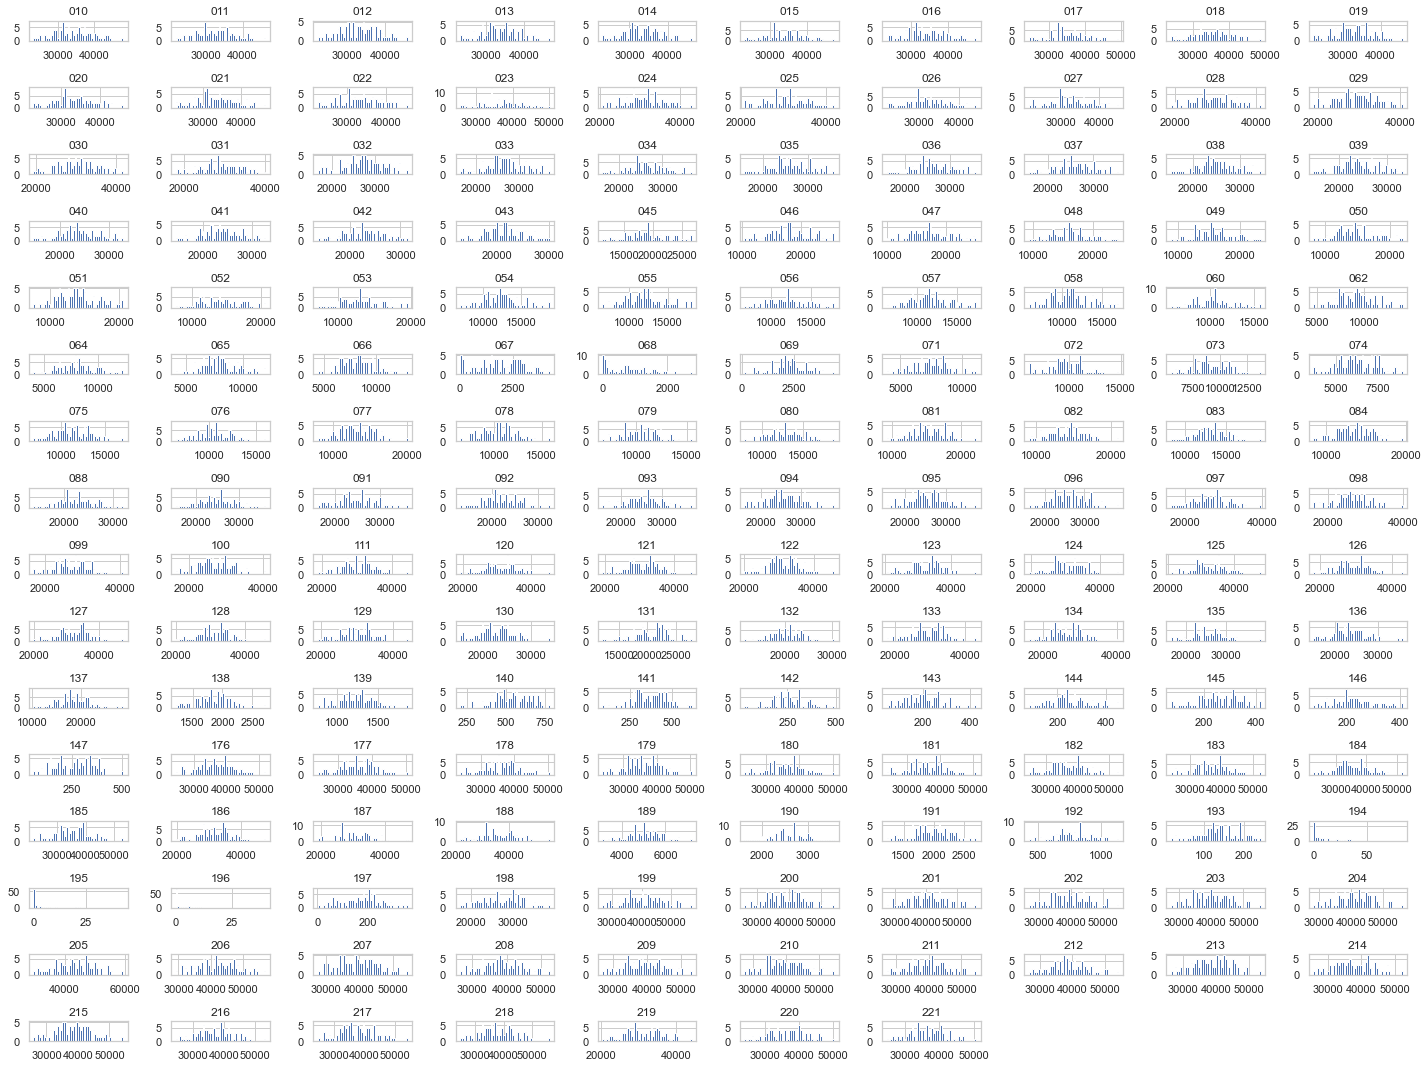

In [6]:
# Histograms for each feature
data.hist(bins=50, layout=(16,10), figsize=(20,15))
plt.tight_layout()
plt.show()

In [7]:
# Checking for missing values and data types
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values

Lithology    0
010          0
011          0
012          0
013          0
            ..
217          0
218          0
219          0
220          0
221          0
Length: 158, dtype: int64

In [8]:
data_types

Lithology    object
010           int64
011           int64
012           int64
013           int64
              ...  
217           int64
218           int64
219           int64
220           int64
221           int64
Length: 158, dtype: object

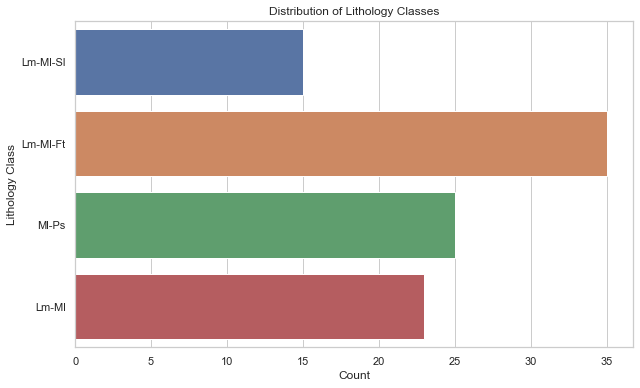

4

In [9]:
# Distribution of the target variable 'Lithology'
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Lithology'])
plt.title('Distribution of Lithology Classes')
plt.xlabel('Count')
plt.ylabel('Lithology Class')
plt.show()

# Checking the number of unique classes
unique_classes = data['Lithology'].nunique()
unique_classes

In [10]:
# Dropping the target variable to focus on feature variables
features = data.drop('Lithology', axis=1)

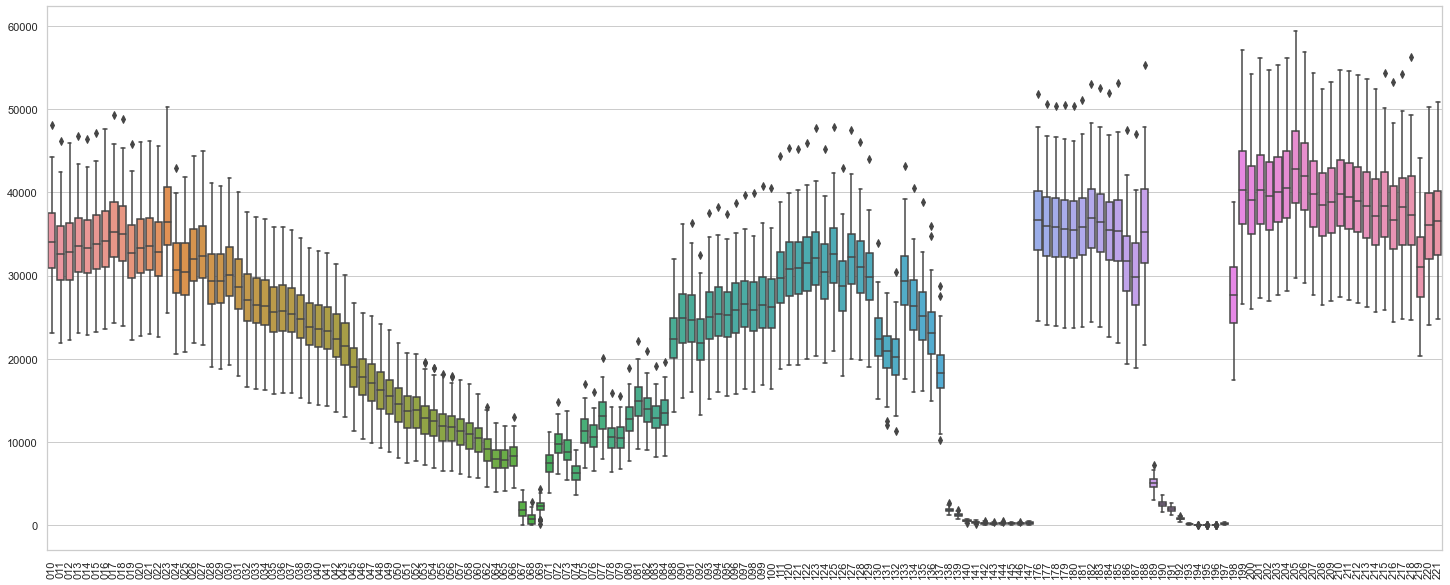

In [11]:
# Box plot for each feature
plt.figure(figsize=(25, 10))
sns.boxplot(data=features)
plt.xticks(rotation=90)
plt.show()

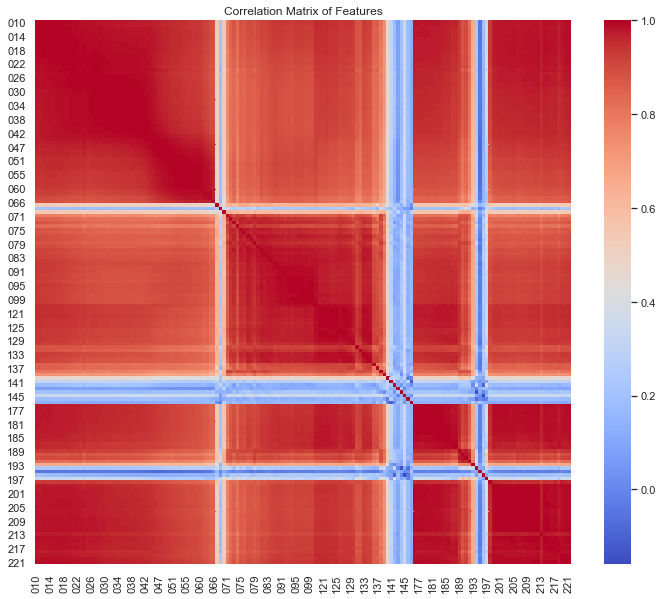

In [12]:
# Checking for any obvious correlations between features, which might suggest multicollinearity.
# Analyze the range and distribution of the feature variables to understand their scale and variance.
# Perform a correlation analysis to check for multicollinearity among features. 
# This is important because high correlation between features can impact the performance of some machine learning models.

# Summary statistics of the feature variables
feature_summary = features.describe()

# Correlation matrix to check for multicollinearity
correlation_matrix = features.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".1f")
plt.title('Correlation Matrix of Features')
plt.show()

# Checking for highly correlated features (above 0.75 threshold)
high_correlation = np.where(correlation_matrix > 0.75)
high_corr_pairs = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) for x,y in zip(*high_correlation) if x != y and x < y]

The exploratory data analysis reveals the following:

**Feature Distribution:** 

The summary statistics of the features show a wide range in values, suggesting the need for scaling.

**Multicollinearity:** 

There are numerous pairs of features with high correlation (above 0.75). This multicollinearity can affect certain machine learning models, especially linear models like logistic regression.

----
**Recommended Steps**

**Feature Scaling:** 

Since the range of values across different features varies significantly, scaling is necessary to ensure that all features contribute equally to the model.

**Feature Selection or Dimensionality Reduction:** 

To address the issue of multicollinearity, we can consider techniques like Principal Component Analysis (PCA) or feature selection methods to reduce the number of features or to create uncorrelated features.

**Class Imbalance Techniques:** 

To address the issue of class imbalance, we consider SMOTE, ADASYN, SMOTETomek and SMOTEnn. Consider using cross-validation to better evaluate these techniques

**Model Selection:** 

Given the multicollinearity and number of features, ensemble methods like Random Forests or Gradient Boosting might perform better as they are less sensitive to multicollinearity. However, we will also consider a linear model for comparison.

**Model Evaluation Metrics:** 

For a multi-class classification problem, accuracy, precision, recall, F1-score, and confusion matrix are suitable metrics

# ML Modelling

In [13]:
target = data['Lithology']

## Scale the Data

In [14]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# scaler = RobustScaler()
# scaled_features = scaler.fit_transform(features)

In [15]:
X, y = scaled_features, target.to_numpy()

## Feature Selection

### High Correlation

In [16]:
features_to_drop = {pair[1] for pair in high_corr_pairs}
features_to_keep = [col for col in data.drop('Lithology', axis=1).columns if col not in features_to_drop]

index = [features.columns.get_loc(c) for c in features_to_keep if c in features]
X_corr = X[:, index]

X_corr.shape

(98, 16)

### Principal Component Analysis (PCA)

(98, 10)

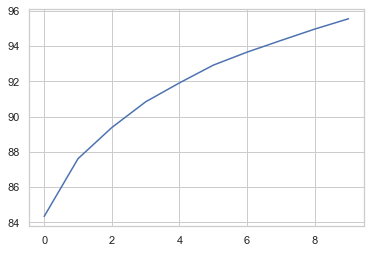

In [17]:
# PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
X_pca.shape

### KBest Features

In [18]:
# KBest Features
kbest = SelectKBest(score_func=f_classif, k=20)
X_kbest = kbest.fit_transform(X, y)

X_kbest.shape

(98, 20)

In [19]:
kbest.get_support(indices=True)

array([ 53,  54,  56,  57,  94,  95,  98, 100, 102, 104, 105, 107, 110,
       124, 125, 126, 127, 129, 130, 132])

### Recursive Feature Elimination (RFE)

In [20]:
# RFE Features
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)
X_rfe = rfe.fit_transform(X, y)

X_rfe.shape

(98, 20)

In [21]:
rfe.get_support(indices=True)

array([ 54,  55,  57,  58,  59,  60,  61,  65,  95, 105, 115, 117, 118,
       120, 122, 123, 124, 128, 130, 131])

### Mutual Info Scores

In [22]:
mi_score = mutual_info_classif(X, y)

mi_df = pd.DataFrame({'feature':features.columns, 'importance':mi_score})
mi_df = mi_df.sort_values(by=['importance'], ascending=False).reset_index(drop=True)

mi_cols = mi_df.head(20).feature.tolist()
index = [features.columns.get_loc(c) for c in mi_cols if c in features]
X_mi = X[:, index]

X_mi.shape

(98, 20)

### Random Forest Classifier (RFC) Importance

In [23]:
rfc = RandomForestClassifier(n_estimators=100)

xrfc = rfc.fit(X, y)
rfc_df = pd.DataFrame({'feature':features.columns, 'importance':rfc.feature_importances_})
rfc_df = rfc_df.sort_values(by=['importance'], ascending=False).reset_index(drop=True)

rfc_cols = rfc_df.head(20).feature.tolist()
index = [features.columns.get_loc(c) for c in rfc_cols if c in features]
X_rfc = X[:, index]

X_rfc.shape

(98, 20)

In [24]:
# Split the dataset for each type of Feature Selection and compile in a dictionary object
fs_dict = {
    'corr' : X_corr,
    'pca' : X_pca,
    'kbest' : X_kbest,
    'rfe' : X_rfe,
    'mi' : X_mi,
    'rfc' : X_rfc
}

fs_split_dict = {}
for fs_type, xfs in fs_dict.items():
    Xtn, Xt, ytn, yt = train_test_split(xfs, y, test_size=0.2, random_state=42)
    fsd = {}
    fsd[f'X_train'] = Xtn
    fsd[f'X_test'] = Xt
    fsd[f'y_train'] = ytn
    fsd[f'y_test'] = yt
    fs_split_dict[fs_type] = fsd

In [25]:
print(fs_split_dict.keys())
print(fs_split_dict['pca'].keys())
print(fs_split_dict['pca']['y_train'])

dict_keys(['corr', 'pca', 'kbest', 'rfe', 'mi', 'rfc'])
dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])
['Lm-Ml-Ft' 'Ml-Ps' 'Ml-Ps' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml-Sl'
 'Ml-Ps' 'Lm-Ml-Sl' 'Lm-Ml' 'Lm-Ml' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml'
 'Lm-Ml-Sl' 'Lm-Ml-Ft' 'Ml-Ps' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml-Ft'
 'Lm-Ml-Sl' 'Lm-Ml' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml' 'Lm-Ml-Ft' 'Lm-Ml'
 'Lm-Ml-Sl' 'Lm-Ml-Ft' 'Lm-Ml-Sl' 'Ml-Ps' 'Lm-Ml-Ft' 'Lm-Ml-Sl' 'Ml-Ps'
 'Lm-Ml-Sl' 'Ml-Ps' 'Lm-Ml-Ft' 'Lm-Ml' 'Lm-Ml' 'Ml-Ps' 'Lm-Ml' 'Ml-Ps'
 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml' 'Lm-Ml' 'Lm-Ml' 'Lm-Ml' 'Ml-Ps' 'Lm-Ml-Ft'
 'Ml-Ps' 'Lm-Ml-Ft' 'Ml-Ps' 'Lm-Ml' 'Lm-Ml-Ft' 'Ml-Ps' 'Lm-Ml' 'Ml-Ps'
 'Ml-Ps' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml-Sl' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml-Sl'
 'Lm-Ml-Ft' 'Lm-Ml' 'Ml-Ps' 'Ml-Ps' 'Ml-Ps' 'Ml-Ps' 'Lm-Ml-Ft' 'Ml-Ps'
 'Lm-Ml-Ft' 'Lm-Ml-Sl' 'Ml-Ps' 'Ml-Ps']


## Class Imbalance Fixes

In [26]:
imb_fixes = {
    'SMOTE': SMOTE(),
    'ADASYN': ADASYN(sampling_strategy='minority'),
    'SMOTETomek': SMOTETomek(),
    'SMOTEnn': SMOTEENN(),
}

In [27]:
# Apply each of the Class Imbalance fix to each of the feature selection type
# 4 Class Imbalance fix methods and 6 Feature Selection types - 24 combinations
imb_dict = {}
for imb_name, imb_fix in imb_fixes.items():
    imb = {}

    for fs_type, fsd in fs_split_dict.items():
        xx, yy = imb_fix.fit_resample(fsd['X_train'], fsd['y_train'])

        fss = {}
        fss['X_train'] = xx
        fss['X_test'] = fsd['X_test']
        fss['y_train'] = yy
        fss['y_test'] = fsd['y_test']

        imb[fs_type] = fss

    imb_dict[imb_name] = imb

In [28]:
print(imb_dict.keys())
print(imb_dict['SMOTE'].keys())
print(imb_dict['SMOTE']['pca'].keys())
print(imb_dict['SMOTE']['pca']['y_train'])

dict_keys(['SMOTE', 'ADASYN', 'SMOTETomek', 'SMOTEnn'])
dict_keys(['corr', 'pca', 'kbest', 'rfe', 'mi', 'rfc'])
dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])
['Lm-Ml-Ft' 'Ml-Ps' 'Ml-Ps' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml-Sl'
 'Ml-Ps' 'Lm-Ml-Sl' 'Lm-Ml' 'Lm-Ml' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml'
 'Lm-Ml-Sl' 'Lm-Ml-Ft' 'Ml-Ps' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml-Ft'
 'Lm-Ml-Sl' 'Lm-Ml' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml' 'Lm-Ml-Ft' 'Lm-Ml'
 'Lm-Ml-Sl' 'Lm-Ml-Ft' 'Lm-Ml-Sl' 'Ml-Ps' 'Lm-Ml-Ft' 'Lm-Ml-Sl' 'Ml-Ps'
 'Lm-Ml-Sl' 'Ml-Ps' 'Lm-Ml-Ft' 'Lm-Ml' 'Lm-Ml' 'Ml-Ps' 'Lm-Ml' 'Ml-Ps'
 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml' 'Lm-Ml' 'Lm-Ml' 'Lm-Ml' 'Ml-Ps' 'Lm-Ml-Ft'
 'Ml-Ps' 'Lm-Ml-Ft' 'Ml-Ps' 'Lm-Ml' 'Lm-Ml-Ft' 'Ml-Ps' 'Lm-Ml' 'Ml-Ps'
 'Ml-Ps' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml-Sl' 'Lm-Ml-Ft' 'Lm-Ml-Ft' 'Lm-Ml-Sl'
 'Lm-Ml-Ft' 'Lm-Ml' 'Ml-Ps' 'Ml-Ps' 'Ml-Ps' 'Ml-Ps' 'Lm-Ml-Ft' 'Ml-Ps'
 'Lm-Ml-Ft' 'Lm-Ml-Sl' 'Ml-Ps' 'Ml-Ps' 'Lm-Ml' 'Lm-Ml' 'Lm-Ml' 'Lm-Ml'
 'Lm-Ml' 'Lm-Ml' 'Lm-Ml' 'Lm-Ml' 'Lm-Ml' 'Lm-Ml

# Run Models

In [29]:
models = {
    # 'LightGBM' : LGBMClassifier(),
    'Logit' : LogisticRegression(class_weight='balanced'),
    'DTree' : DecisionTreeClassifier(class_weight='balanced'),
    'RForest' : RandomForestClassifier(class_weight='balanced'),
    'AdaBoost' : AdaBoostClassifier(),
    'GBoost' : GradientBoostingClassifier()
}

In [32]:
# Run 5 ML Models on 24 different input types based on Class Imbalance fix and Feature selection methods
# 120 different model types

metrix = dict()
model_dict = dict()
# cv_scores = dict()

for model_name, model in tqdm(models.items(), desc='Looping ML Models'):

    for imb_name, fs_data in imb_dict.items():

        for fs_name, data in fs_data.items():

            # print(f'{model_name} | {imb_name} | {fs_name}')
            key = f'{model_name}-{imb_name}-{fs_name}'

            X_train, X_test, y_train, y_test = data['X_train'], data['X_test'], data['y_train'], data['y_test']

            model.fit(X_train, y_train) 
            y_pred = model.predict(X_test)
            y_probs = model.predict_proba(X_test)[:, 1]

            metrix[key] = classification_report(y_test, y_pred, zero_division=0, digits=3)
            model_dict[key] = model 
            # cv_scores[key] = cross_val_score(model, X_train, y_train, cv=3)

Looping ML Models:   0%|          | 0/5 [00:00<?, ?it/s]

In [33]:
for k, v in metrix.items():
    print(k)
    print(v)
    print('---')

Logit-SMOTE-corr
              precision    recall  f1-score   support

       Lm-Ml      0.000     0.000     0.000         7
    Lm-Ml-Ft      0.250     0.333     0.286         6
    Lm-Ml-Sl      0.400     0.500     0.444         4
       Ml-Ps      0.250     0.333     0.286         3

    accuracy                          0.250        20
   macro avg      0.225     0.292     0.254        20
weighted avg      0.193     0.250     0.217        20

---
Logit-SMOTE-pca
              precision    recall  f1-score   support

       Lm-Ml      1.000     0.429     0.600         7
    Lm-Ml-Ft      0.333     0.167     0.222         6
    Lm-Ml-Sl      0.250     0.500     0.333         4
       Ml-Ps      0.167     0.333     0.222         3

    accuracy                          0.350        20
   macro avg      0.438     0.357     0.344        20
weighted avg      0.525     0.350     0.377        20

---
Logit-SMOTE-kbest
              precision    recall  f1-score   support

       Lm-Ml    

# Results

#### **Model Diversity**: 
* We have experimented with a variety of models and resampling techniques. This is a good approach in tackling imbalanced datasets, as different models have varying strengths and weaknesses.

#### **Class Imbalance**: 
* The dataset appears to be imbalanced, as indicated by the fluctuating performance across different classes. Techniques like SMOTE, ADASYN, and their variations are specifically used to handle such imbalances.

#### **Performance Metrics**: 
* Precision measures the accuracy of positive predictions. A low precision indicates many false positives. Recall reflects the ability of a model to find all the relevant cases. Low recall indicates many false negatives.
* F1-score is a harmonic mean of precision and recall. A higher F1-score suggests a balance between precision and recall.
Accuracy measures the proportion of correct predictions. However, in imbalanced datasets, it can be misleading.

#### **Performance Variation**: 
* There's a noticeable variation in performance across different classes and models. This suggests the models might be better at predicting certain classes over others.
* Some models show high precision or recall for certain classes but low values for others, indicating a possible overfitting to specific class characteristics.

#### **Best Performing Models**: 
* To identify the best models, a balance of high precision, recall, and F1-score across all classes is often required. However, the choice of 'best' can be subjective, depending on whether you prioritize precision, recall, or overall accuracy. 
* It seems none of the models consistently outperform others across all metrics, which is common in complex, imbalanced datasets.

#### **Impact of Resampling Techniques**: 
* The use of SMOTE, ADASYN, and their variations seem to have varying effects on different models. It's crucial to choose a resampling technique that complements the inherent biases and strengths of the chosen model.

#### **Specific Class Performance**: 
* Some classes consistently show lower performance metrics, which could be due to fewer instances in the training data or more complex patterns that are harder for models to learn.

#### **Overfitting/Underfitting**: 
* The significant differences in performance metrics could also indicate overfitting (model too complex) or underfitting (model too simple).
